In [1]:
%matplotlib inline 

import numpy as np 
import pandas as pd
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
ourdata = pd.read_csv('measured_rps.csv')

In [3]:
keplerdata = pd.read_csv('data/Table_1_Periodic.txt', header = 0)

In [4]:
#temp 
kep_rot = keplerdata['Prot']
kep_temp = keplerdata['Teff']
our_rot = ourdata['period']


In [5]:
keplerdata

,KID,Teff,logg,Mass,Prot,Prot_err,Rper,LPH,w,DC,Flag
0,892376,3813,4.47,0.4699,1.532,0.007,7306.69,0.823,0.4503,0,---
1,1026146,4261,4.57,0.6472,14.891,0.120,11742.56,1.405,0.7229,0,---
2,1026474,4122,4.56,0.5914,1.569,0.006,30471.80,1.204,0.6061,0,---
3,1162635,3760,4.77,0.4497,15.678,0.019,10207.47,0.978,0.5445,1,---
4,1164102,4045,4.62,0.5606,31.496,0.474,5139.74,0.568,0.3939,0,---
5,1292688,3774,4.74,0.4550,42.659,2.131,6320.15,0.530,0.3172,1,---
6,1297303,4296,4.61,0.6613,27.333,0.193,6189.53,0.777,0.5124,0,---
7,1429921,4217,4.72,0.6295,23.131,0.110,15370.91,0.943,0.5839,0,---
8,1430349,4285,4.54,0.6569,34.717,0.752,3244.49,0.376,0.2563,0,---
9,1430893,3925,4.72,0.5133,17.045,0.026,13583.24,1.429,0.7204,1,---


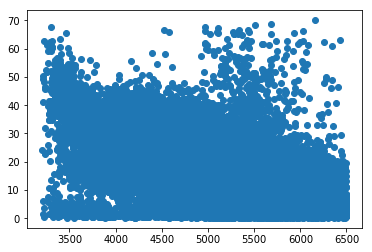

In [6]:
plt.scatter(kep_temp,kep_rot)

In [7]:
danielles = Table.read('Interns_tic_table.fits')

In [8]:
danielles

ID,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,acf2,acf3,acfamp1,acfamp2,acfamp3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,bytes12,bytes10,bytes16,bytes1,bytes19,bytes19,bytes8,int64,bytes4,bytes10,float64,float64,bytes10,float64,float64,float64,float64,bytes6,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,float64,float64,float64,float64,float64,int64,float64,bytes5,bytes1,float64,float64,float64,bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,float64,float64,bytes6,float64,float64,float64,float64,int64,bytes1,bytes8,bytes8,bytes15,float64,float64,float64,float64,float64,float64,int64,int64,int64
140596802,12,0.00884114503860478,16.706260900944248,5.841991250946412,7.74480008922099,0.0009844859317335512,0.0007971077410083647,0.000769565568876416,0.0694445,0.10833342,0.11666676000000001,0.07438499285553628,0.07088213950314902,0.07044418149069456,20190415,999999,N/A,085-008694,04354681-7310582,N,J043547.01-731057.2,4652695019004642816,33569267,999999,STAR,tmgaia2,68.9451853939535,-73.1828252425686,tmgaia2,72.696,0.0478269,76.5599,0.0764929,gaia2,9.55464,0.0245721,gaia2,285.787824316141,-35.461086188747,307.999149396613,-80.2801364066419,14.485,0.02,13.061,0.103,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.516,0.021,9.838,0.024,9.693,0.023,AAA-222-111-000-0-0,nan,9.596,0.022,9.656,0.02,9.497,0.031,8.846,0.31,12.5558,0.000257,11.7202,0.006,rered,spect,4183.0,167.462,4.58923,0.14693,nan,nan,0.677451,0.0852611,0.65,0.0873477,2.09064,0.900931,DWARF,0.126590624,0.0120322,104.346,0.2695,0.0383915,0.0103480648,402,0.1625549,N/A,N,0.00480603939,0.00837963,0.0123165,schlegel,0.0654884,0.109207,0.0653432,0.105179,0.693003,1.10886,0.169323,0.124536,0.0101946,0.0138698,0.269,0.27,bj2018,205.956,128.967,spect,13.403,0.00243,11.6608,0.001292,1,N,ucac4,apassdr9,N/A,0.923572075637444,1.18610850022013,68.9462672342188,-73.1824956124917,0.0228439048191823,0.0333359154433491,1,0,526088389
140662908,12,0.009300917387008667,11.126577208091328,14.541671029211601,10.330048345109706,0.00041206489932074235,0.00040410499812888805,0.00039716569348187733,0.0694445,0.23750019,0.37916697,0.10296693400314251,0.08783056356026213,0.07762767587797512,20190415,999999,N/A,082-006345,04501677-7344473,N,J045016.84-734446.0,4652421725949033472,33574348,999999,STAR,tmgaia2,72.5699230560308,-73.7464913528733,tmgaia2,23.1729,0.14404,116.884,0.158247,gaia2,7.30665,0.0719418,gaia2,285.922787547113,-34.2910076807851,301.487538923875,-80.7633351030752,14.324,0.038,13.057,0.114,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.709,0.024,10.062,0.022,9.922,0.025,AAA-22

In [9]:
# count = 0

our_tics = []
our_temps = []
our_gaiabp = []
our_gaiarp = []

for row in danielles:
    tic = row['ID']
    temp = row['Teff']
    bp = row['gaiabp']
    rp = row['gaiarp']
    ourtics = ourdata['tic'].values
    if tic in ourtics:
        #print(count)
        #count+= 1
        our_tics.append(tic)
        our_temps.append(temp)
        our_gaiabp.append(bp)
        our_gaiarp.append(rp)
        
    else:
        pass

In [10]:
data_to_add = {'tic' : our_tics, 'temp': our_temps, 'bp':our_gaiabp ,'rp' :our_gaiarp}
df_to_add = pd.DataFrame(data = data_to_add)
df_to_add

,tic,temp,bp,rp
0,141526439,3624.0,13.9832,11.79620
1,141527965,4280.0,13.1119,11.48570
2,149497763,3736.0,13.4823,11.44160
3,150189995,4380.0,12.8811,11.37250
4,150437065,4013.0,13.0292,11.25390
5,167795767,4165.0,13.4372,11.70860
6,176872276,4290.0,13.2311,11.49990
7,177284607,4466.0,12.5355,11.15150
8,220428553,3732.0,NaN,NaN
9,25155612,4241.0,NaN,NaN


In [11]:
ourdata_withtemp = ourdata.merge(df_to_add, sort = True, on = 'tic')

<Figure size 2000x1000 with 0 Axes>

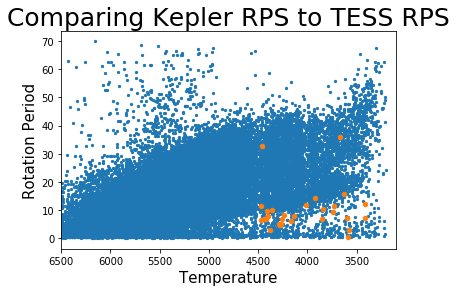

<Figure size 2000x1000 with 0 Axes>

In [12]:
#keplers
plt.scatter(kep_temp,kep_rot, s = 5, zorder = 0)


#ours
plt.scatter(ourdata_withtemp['temp'],ourdata_withtemp['period'], s = 20,zorder = 1 )
plt.title("Comparing Kepler RPS to TESS RPS", fontsize = 25)

plt.xlim(6500,3100)
plt.xlabel("Temperature", fontsize =15)
plt.ylabel("Rotation Period", fontsize =15)

plt.figure(figsize = (10,5), dpi = 200)


In [13]:
def age_model(log10_period, bprp):
    """
    Predicts log10 age from log10 color and log10 period.
    Args:
        log10_period (array): The (log10) period array.
        log10_bprp (array): The (log10) G_bp - G_rp color array.
    Returns:
        log10_age (array): The (log10) age  array.
    """
    # If star is very hot, return the age of the Universe.
    # Don't try to take the log of a negative number.
    if bprp < 0:
        return 10.14

    log10_bprp = np.log10(bprp)

    # Hard-code the gyro parameters :-)
    p = [-38.957586198640314, 28.709418579540294, -4.919056437046026,
        0.7161114835620975, -4.716819674578521, 0.6470950862322454,
        -13.558898318835137, 0.9359250478865809]

    # p = [-38.982347111370984, 28.706848179526098, -4.922906414784183,
    #      0.7176636876966253, -5.489008990829778, 0.7347258099244045,
    #      -13.55785651951684, 0.16105197784241776]

    if log10_bprp >= .43:
        # return (log10_period - np.polyval(p[6:], log10_bprp))/p[5]
        return 10.14  # The age of the universe
    elif log10_bprp < -.25:
        return 10.14
    else:
        logage = (log10_period - np.polyval(p[:5], log10_bprp))/p[5]
        return logage

In [14]:
bprp = .82  # Gaia BP - RP color.
log10_period = np.log10(26)
log10_age_yrs = age_model(log10_period, bprp)
print((10**log10_age_yrs)*1e-9, "Gyr")

4.565055357152765 Gyr


In [15]:
ourdata_withtemp

,tic,period,temp,bp,rp
0,25155612,8.078025,4241.0,NaN,NaN
1,38461205,35.995205,3673.0,13.9459,11.82600
2,38461375,7.057561,3602.0,14.1382,11.91990
3,38507842,7.723481,4137.3,NaN,NaN
4,38510224,9.837096,4356.0,13.1507,11.69170
5,38510271,2.931013,3578.0,13.8222,11.56770
6,38586374,32.581667,4457.0,13.1440,11.76650
7,38678931,7.768626,4396.0,13.4481,12.08420
8,55498515,11.976158,3416.0,14.1066,11.57670
9,55604374,6.919293,3849.0,13.7606,11.84580


In [22]:
######################iterate over the result dataframe to plug in needed values#####################
# remember to check each item prints the way you expect it to
# you will need conditionals to deal with Nan values
#starting structure
ages = []
for row in ourdata_withtemp.values:#.to_numpy():
    #grab necessary data values 
    tic = row[0]
    period = row[1]
    bp = row[3]
    rp = row[4]
    #conditional check for Nans
    if np.isnan(bp)== False:
        bprp = bp - rp
        #stellar ages calculation
        log10_period = np.log10(period)
        log10_age_yrs = age_model(log10_period, bprp)
        print("TIC:", tic, "age is ", (10**log10_age_yrs)*1e-9, "Gyr")
        #save ages
        age = (10**log10_age_yrs)*1e-9
        ages.append(age)
    else:
        print("No color data-can't get age")
        #save ages so maintains table order/length
        age = -9999
        ages.append(age)

No color data-can't get age
TIC: 38461205.0 age is  1.921071706356266 Gyr
TIC: 38461375.0 age is  0.14220384485432816 Gyr
No color data-can't get age
TIC: 38510224.0 age is  0.49467698207478 Gyr
TIC: 38510271.0 age is  0.03553871791452343 Gyr
TIC: 38586374.0 age is  3.3389414334576646 Gyr
TIC: 38678931.0 age is  0.367540978126827 Gyr
TIC: 55498515.0 age is  0.2680950577003562 Gyr
TIC: 55604374.0 age is  0.18424737255088938 Gyr
TIC: 55745883.0 age is  0.12251203251248804 Gyr
TIC: 141526439.0 age is  0.4987498262282755 Gyr
TIC: 141527965.0 age is  0.1386205186944955 Gyr
TIC: 149497763.0 age is  0.25268877932963973 Gyr
TIC: 150189995.0 age is  0.0731646217124229 Gyr
TIC: 150437065.0 age is  0.47565680626957013 Gyr
TIC: 167795767.0 age is  0.190479173131703 Gyr
TIC: 176872276.0 age is  0.1392383274800936 Gyr
TIC: 177284607.0 age is  0.6585799855473927 Gyr
No color data-can't get age
TIC: 281631603.0 age is  0.33404757209512603 Gyr
No color data-can't get age
TIC: 295072161.0 age is  0.2526

In [23]:
ourdata_withtemp['Age_in_Gyr'] = ages
ourdata_withtemp

,tic,period,temp,bp,rp,Age_in_Gyr,Age_unc
0,25155612,8.078025,4241.0,NaN,NaN,-9999.000000,NaN
1,38461205,35.995205,3673.0,13.9459,11.82600,1.921072,1.380384
2,38461375,7.057561,3602.0,14.1382,11.91990,0.142204,1.380384
3,38507842,7.723481,4137.3,NaN,NaN,-9999.000000,NaN
4,38510224,9.837096,4356.0,13.1507,11.69170,0.494677,1.380384
5,38510271,2.931013,3578.0,13.8222,11.56770,0.035539,1.380384
6,38586374,32.581667,4457.0,13.1440,11.76650,3.338941,1.380384
7,38678931,7.768626,4396.0,13.4481,12.08420,0.367541,1.380384
8,55498515,11.976158,3416.0,14.1066,11.57670,0.268095,1.380384
9,55604374,6.919293,3849.0,13.7606,11.84580,0.184247,1.380384


In [24]:
ourdata_withtemp['temp']

0     4241.0
1     3673.0
2     3602.0
3     4137.3
4     4356.0
5     3578.0
6     4457.0
7     4396.0
8     3416.0
9     3849.0
10    3418.0
11    3624.0
12    4280.0
13    3736.0
14    4380.0
15    4013.0
16    4165.0
17    4290.0
18    4466.0
19    3732.0
20    3837.0
21    3590.0
22    4470.0
23    3920.0
24    4265.0
25    4442.0
26    4420.3
27    4255.0
28    4405.0
Name: temp, dtype: float64

In [25]:
ages_unc = []
for i in ourdata_withtemp['Age_in_Gyr']:
    certain = i *.1
    ages_unc.append(certain)
ourdata_withtemp['Age_unc'] = ages_unc

In [20]:
ourdata_withtemp

,tic,period,temp,bp,rp,Age_in_Gyr,Age_unc
0,25155612,8.078025,4241.0,NaN,NaN,NaN,NaN
1,38461205,35.995205,3673.0,13.9459,11.82600,13.803843,1.380384
2,38461375,7.057561,3602.0,14.1382,11.91990,13.803843,1.380384
3,38507842,7.723481,4137.3,NaN,NaN,NaN,NaN
4,38510224,9.837096,4356.0,13.1507,11.69170,13.803843,1.380384
5,38510271,2.931013,3578.0,13.8222,11.56770,13.803843,1.380384
6,38586374,32.581667,4457.0,13.1440,11.76650,13.803843,1.380384
7,38678931,7.768626,4396.0,13.4481,12.08420,13.803843,1.380384
8,55498515,11.976158,3416.0,14.1066,11.57670,13.803843,1.380384
9,55604374,6.919293,3849.0,13.7606,11.84580,13.803843,1.380384


(0, 40)

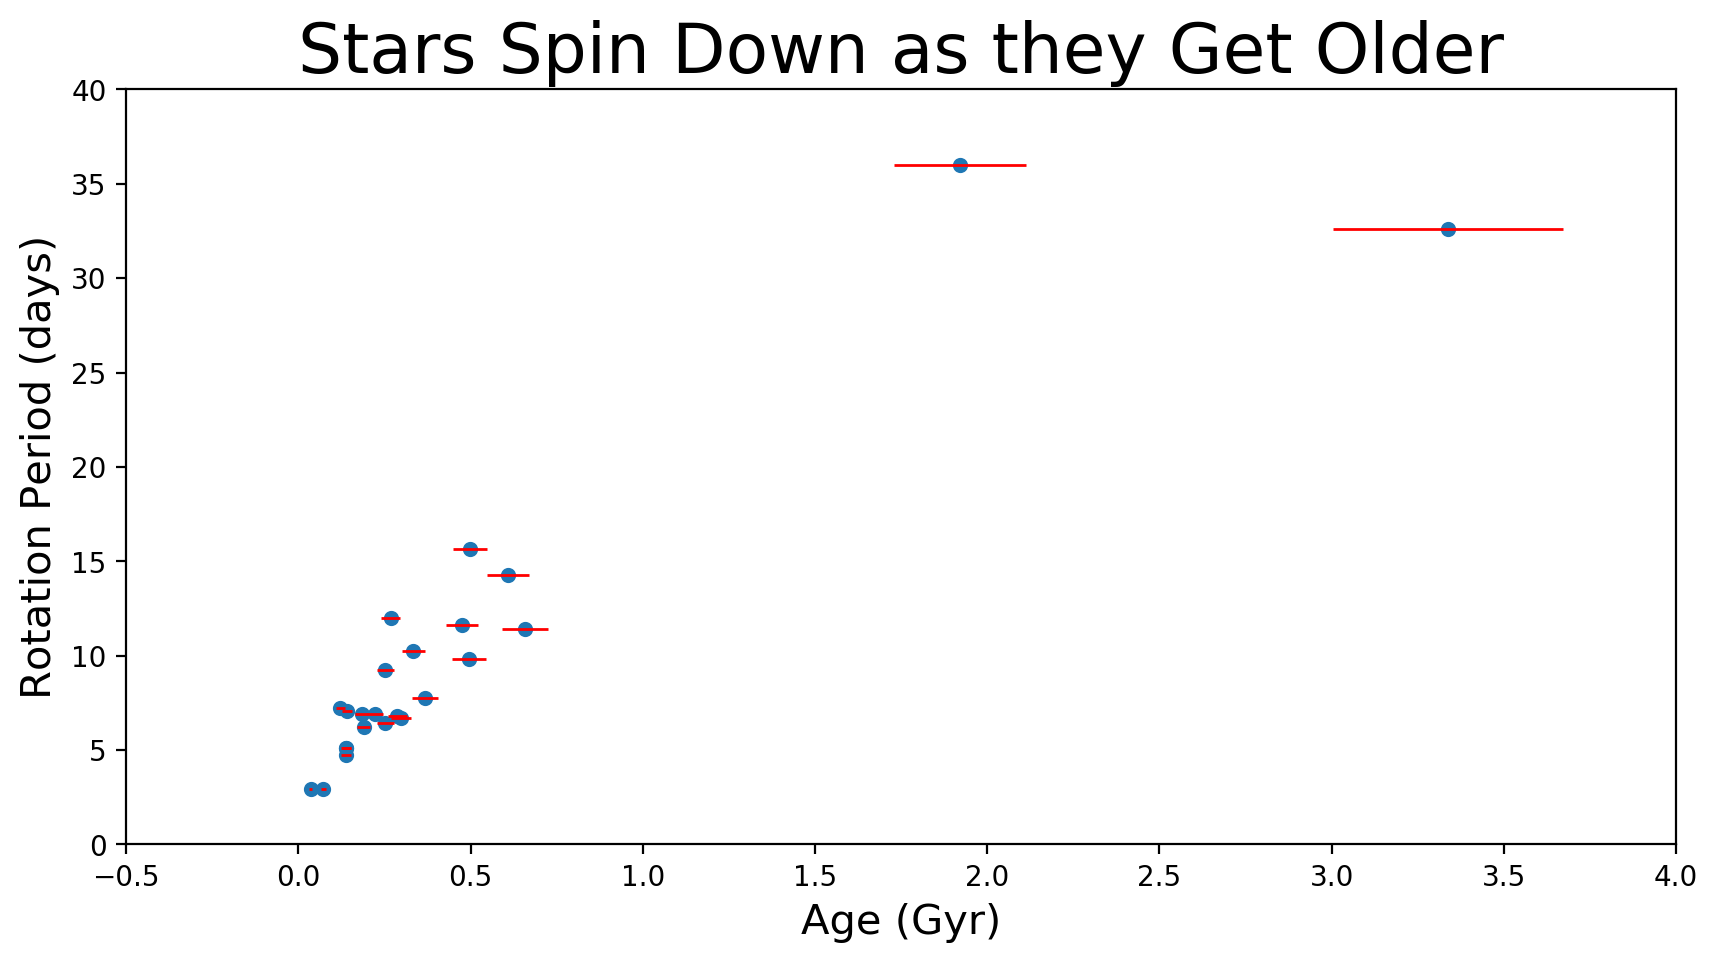

In [26]:
#plot with errorbars
plt.figure(figsize=(10,5),dpi=200)
plt.scatter(ourdata_withtemp['Age_in_Gyr'],ourdata_withtemp['period'],s=20)
plt.errorbar(ourdata_withtemp['Age_in_Gyr'],ourdata_withtemp['period'],xerr=ourdata_withtemp['Age_unc'], linestyle="None",c='r', lw=1)
plt.ylabel('Rotation Period (days)',fontsize=15)
plt.xlabel('Age (Gyr)',fontsize=15)
plt.title('Stars Spin Down as they Get Older',fontsize=25)
plt.xlim(-0.5,4);
plt.ylim(0,40)